In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [7]:
df.rename(columns={'Age':'age',
           'Income($)':'income'},inplace=True)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['age']=scaler.fit_transform(df['age'])
df['income']=scaler.fit_transform(df['income'])

ValueError: Expected 2D array, got 1D array instead:
array=[27. 29. 29. 28. 42. 39. 41. 38. 36. 35. 37. 26. 27. 28. 29. 32. 40. 41.
 43. 39. 41. 39.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
df.head()

,Name,age,income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


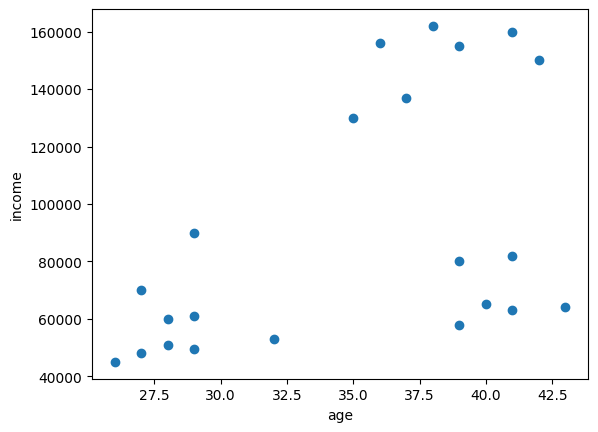

In [9]:
plt.scatter(df['age'],df['income'])
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [10]:
#k=3
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [15]:
sse=[]
sil_score=[]
k_range=range(2,10)
cols=df[['age','income']]
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(cols)
    sse.append(kmeans.inertia_)

    labels=kmeans.labels_
    sil_avg=silhouette_score(cols,labels)
    sil_score.append(sil_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Silhouette Method')

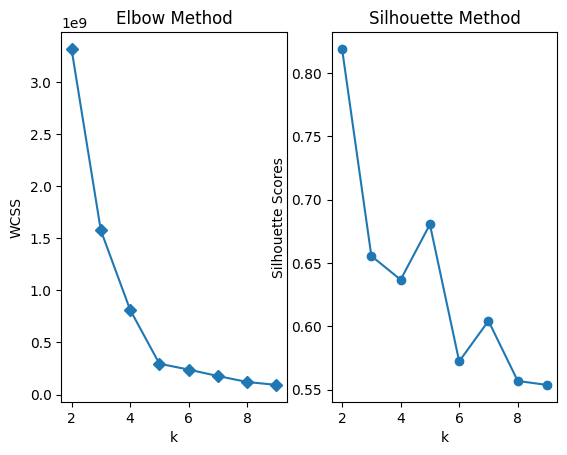

In [16]:
#Plot
fig,(ax1,ax2)=plt.subplots(1,2)
#SSE
ax1.plot(k_range,sse,marker='D')
ax1.set_xlabel('k')
ax1.set_ylabel('WCSS')
ax1.set_title('Elbow Method')

#Silhouette Score
ax2.plot(k_range,sil_score,marker='o')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette Scores')
ax2.set_title('Silhouette Method')



In [17]:
# The plot is suggesting K value of 5
# But I will pick 3 as the value of K
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(cols)
y_pred
df['cluster']=y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df.head()

,Name,age,income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [23]:
# Dendograms

from sklearn.preprocessing import normalize
data=pd.read_csv('Wholesale customers data.csv')
data_scaled=normalize(data)

data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


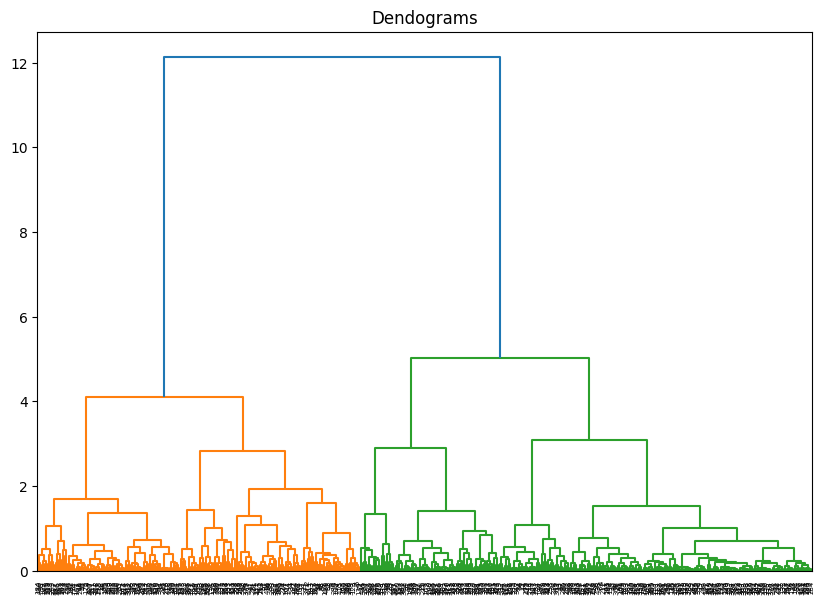

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendograms')
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

In [25]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


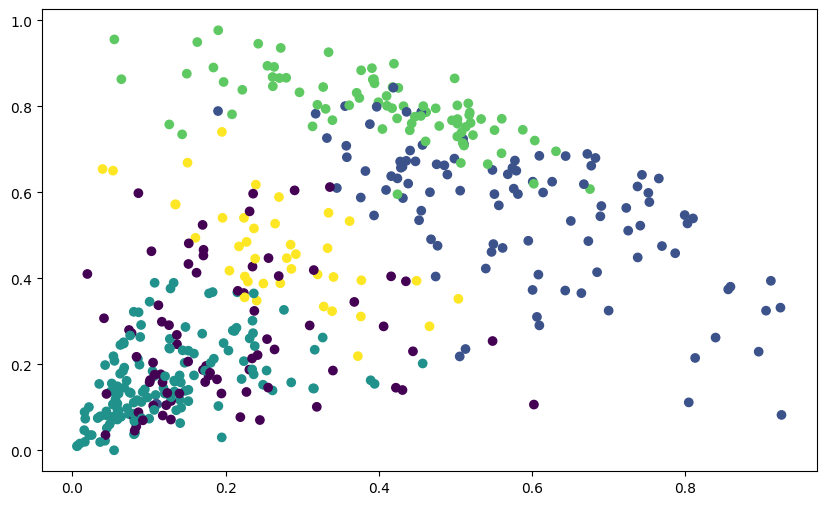

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit(data_scaled)
plt.figure(figsize=(10,6))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster.labels_)